
<b><big>Exploring the Relationship between Lifestyle and Stroke and Stroke Prediction</big></b>

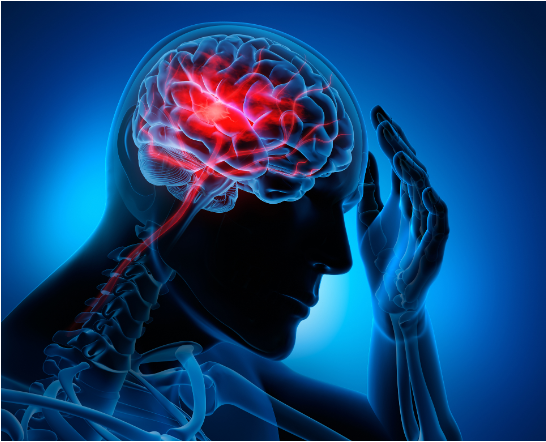

Stroke is a leading cause of death and disability worldwide. There are many risk factors for stroke, including age, gender, smoking, and lifestyle choices. Lifestyle choices such as diet, exercise, and smoking can have a significant impact on the risk of stroke.

This project was conducted to build a logistic regression model that can predict stroke. The model was trained on a dataset of individual features, including age, gender, smoking status, etc. The model achieved an accuracy rate of 94%, meaning it correctly predicted whether or not an individual would have a stroke. The model can help doctors identify individuals at high risk of stroke, which can help improve the prevention and treatment of stroke.

## <b> Project Objectives :
   - <b><h3> Data Analysis and Cleaning</h3></b>
      - Features Description
      - Imports Packages
      - Read Data
      - Handling missing values
      - Data Visualization
      - Questions to understanding the data

- <b><h3> Stroke Prediction Model </b></h3>
 - Featuer Selection
 -  Featuer Encoding
 - Building logistic regression model

- <b><h3> Conclusion  </b></h3>

<h2><b> Data Analysis and Cleaning

### <b> Features Description </b>
* id: This is a unique identifier assigned to each individual in the dataset.

* gender: This variable identifies the gender of each individual.

* age: This variable records the age of each individual, often in years.

* hypertension: This variable indicates whether or not an individual has been diagnosed with hypertension (high blood pressure).

* heart_disease: This variable indicates whether or not an individual has been diagnosed with heart disease.
* ever_married: This variable indicates whether or not an individual has been married at some point in their life.
* work_type: This variable describes the type of work each individual performs., which could include categories such as "private   work", "self-employed", "government job", etc.
* Residence_type: This variable describes the type of residence where each individual lives, which could include categories such   as "urban" or "rural".
* avg_glucose_level: This variable records the average level of glucose (sugar) in an individual's blood, often measured in       milligrams per deciliter (mg/dL).
* bmi: This variable records the body mass index (BMI) of each individual, which is a measure of body fat based on an             individual's height and weight.
* smoking_status: This variable describes the smoking status of each individual, which could include categories such as "never     smoked", "formerly smoked", or "currently smoking".
* stroke: This variable indicates whether or not an individual has suffered a stroke.

<h4><b> Imports Packages

In [189]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

<h4><b> Read Data

In [190]:
# Note : The data set from Kaggle
df=pd.read_csv('healthcare-dataset-stroke-data.csv')

In [191]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [192]:
df.shape

(5110, 12)

In [193]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [195]:
df.isnull().sum()
# we have null value in bmi column

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [196]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


### The missing data
 ####  I will use mean to replace the missing data in bmi .

In [197]:
mean_bmi = df['bmi'].mean()
df['bmi'].fillna(mean_bmi, inplace=True)


In [198]:
df['gender'].value_counts().to_frame()

,gender
Female,2994
Male,2115
Other,1


####  Delete the row with "Other" value in the "gender" column

In [199]:
df = df[df['gender'] != 'Other']

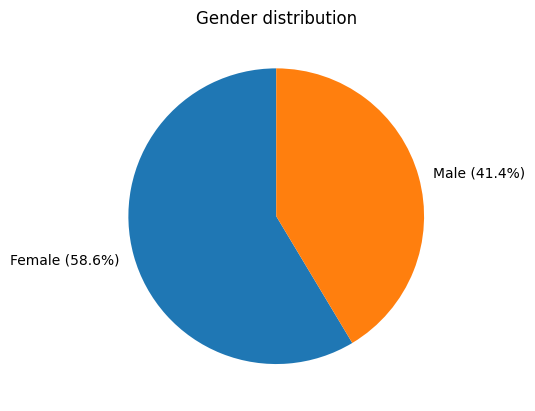

In [200]:
gender_counts = df['gender'].value_counts()

# calculate the gender rates
gender_rates = gender_counts / gender_counts.sum() * 100
mylabels = [f"{gender} ({gender_rates[gender]:.1f}%)" for gender in gender_counts.index]


plt.pie(gender_counts, labels=mylabels, startangle=90)
plt.title("Gender distribution")
plt.show()


In [214]:
df['work_type'].value_counts().to_frame()


,work_type
Private,2924
Self-employed,819
children,687
Govt_job,657
Never_worked,22


Text(0.5, 1.0, 'Count of Individuals by Work Type and Gender')

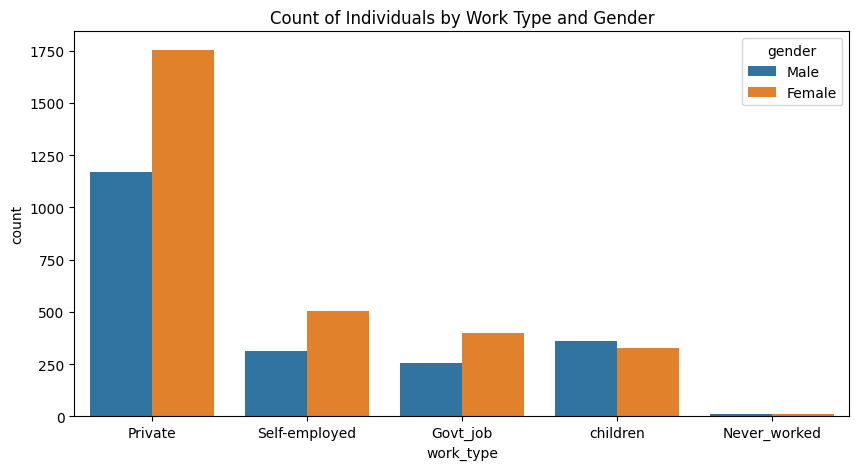

In [202]:
plt.figure(figsize=(10,5),dpi=100)
sns.countplot(data = df,x=df['work_type'],hue="gender")
plt.title("Count of Individuals by Work Type and Gender")


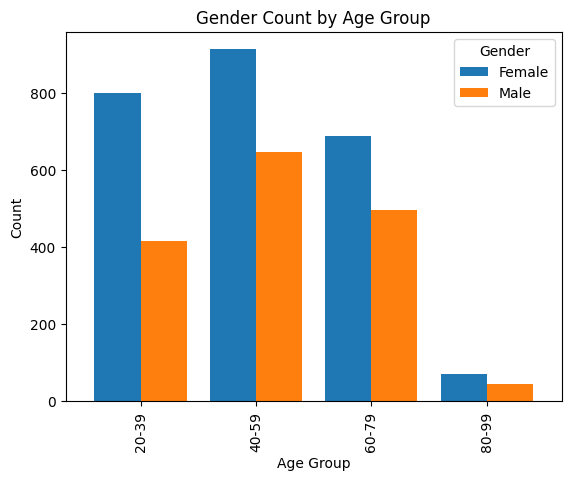

In [203]:
df['age_group'] = pd.cut(df['age'], bins=[20, 40, 60, 80, 100], labels=['20-39', '40-59', '60-79', '80-99'])
age_gender_counts = df.groupby(['age_group', 'gender']).size().unstack()


age_gender_counts.plot(kind='bar', width=0.8)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Gender Count by Age Group')
plt.legend(title='Gender')
plt.show()



### How do hypertension, heart disease, stroke, and smoking rates vary by age group and gender in the given population?

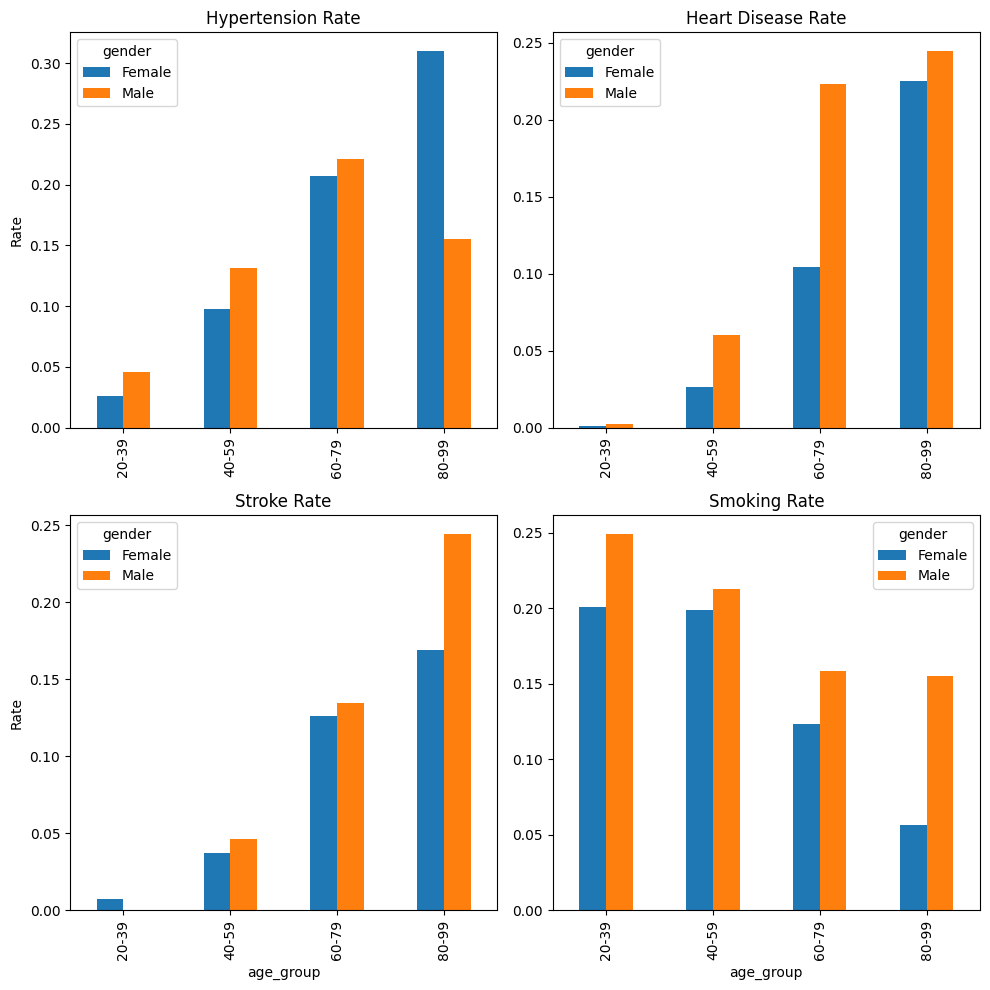

In [204]:
df['age_group'] = pd.cut(df['age'], bins=[20, 40, 60, 80, 100], labels=['20-39', '40-59', '60-79', '80-99'])

# create subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# plot hypertension rate
hypertension_rates = df.groupby(['age_group', 'gender'])['hypertension'].mean().unstack()
hypertension_rates.plot(kind='bar', ax=axs[0, 0])
axs[0, 0].set_title('Hypertension Rate')

# plot heart disease rate
heart_disease_rates = df.groupby(['age_group', 'gender'])['heart_disease'].mean().unstack()
heart_disease_rates.plot(kind='bar', ax=axs[0, 1])
axs[0, 1].set_title('Heart Disease Rate')

# plot stroke rate
stroke_rates = df.groupby(['age_group', 'gender'])['stroke'].mean().unstack()
stroke_rates.plot(kind='bar', ax=axs[1, 0])
axs[1, 0].set_title('Stroke Rate')

# plot smoking rate
smoking_rates = df.groupby(['age_group', 'gender'])['smoking_status'].apply(lambda x: (x == 'smokes').mean()).unstack()
smoking_rates.plot(kind='bar', ax=axs[1, 1])
axs[1, 1].set_title('Smoking Rate')

# remove the x-axis label for the top two plots
for i in range(2):
    axs[0, i].set_xlabel('')
    axs[0, i].xaxis.label.set_visible(False)

# add y-axis label to the left two plots
axs[0, 0].set_ylabel('Rate')
axs[1, 0].set_ylabel('Rate')

# adjust the layout and spacing
plt.tight_layout()
plt.show()


####  How does the distribution of BMI categories vary by age group and gender in this population?
#### How does the average glucose level vary by age group and gender, and is there any relationship between BMI category and average glucose level?

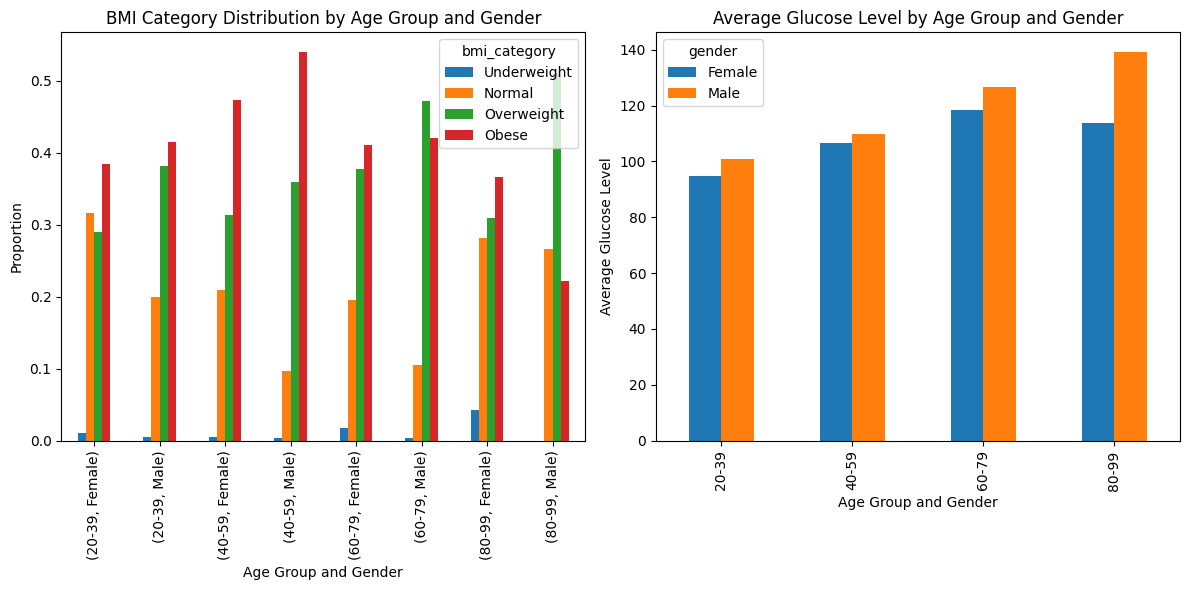

In [205]:

df['bmi_category'] = pd.cut(df['bmi'], bins=[0, 18.5, 25, 30, 100], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])
bmi_rates = df.groupby(['age_group', 'gender', 'bmi_category']).size().unstack().fillna(0)

# Calculate the BMI category rates
bmi_rates = bmi_rates.div(bmi_rates.sum(axis=1), axis=0)

# Group the data by age group and gender, and calculate the average glucose level
glucose_level = df.groupby(['age_group', 'gender'])['avg_glucose_level'].mean()

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

# subplot for the BMI category distribution graph
bmi_rates.plot(kind='bar', ax=axs[0])
axs[0].set_title('BMI Category Distribution by Age Group and Gender')
axs[0].set_xlabel('Age Group and Gender')
axs[0].set_ylabel('Proportion')

#  subplot for the average glucose level by age group and gender
glucose_level.unstack().plot(kind='bar', ax=axs[1])
axs[1].set_title('Average Glucose Level by Age Group and Gender')
axs[1].set_xlabel('Age Group and Gender')
axs[1].set_ylabel('Average Glucose Level')

plt.tight_layout()
plt.show()



### What is the distribution of the 'Residence_type' variable in the dataset?

In [220]:
df['Residence_type'].value_counts().to_frame()

,Residence_type
Urban,2596
Rural,2513


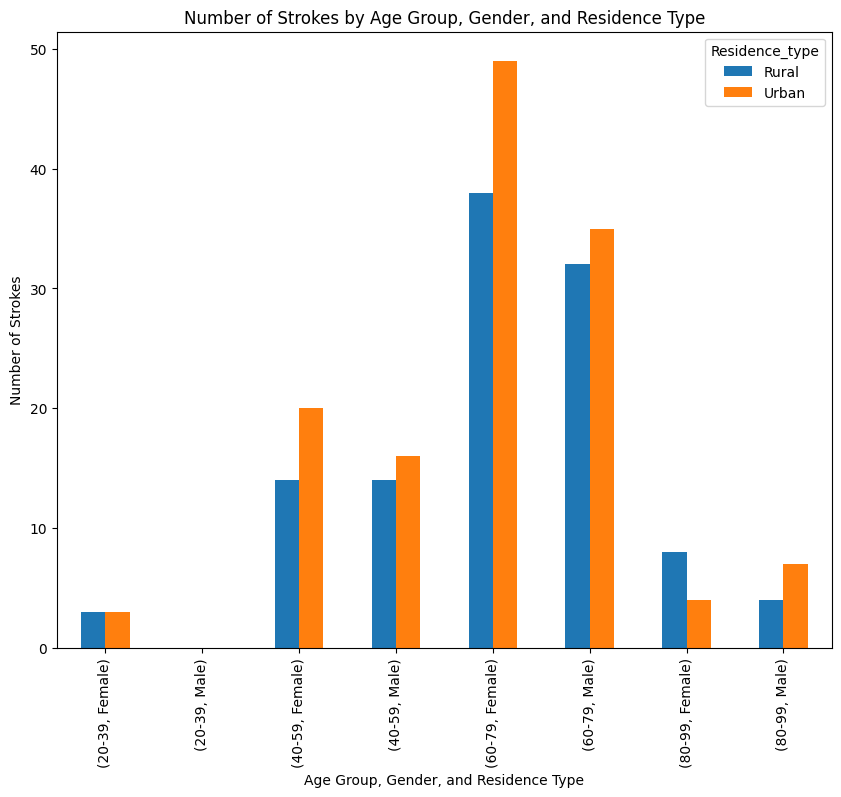

In [207]:
grouped = df.groupby(['age_group', 'gender', 'Residence_type'])['stroke'].sum().unstack()
ax = grouped.plot(kind='bar', figsize=(10,8))
ax.set_title('Number of Strokes by Age Group, Gender, and Residence Type')
ax.set_xlabel('Age Group, Gender, and Residence Type')
ax.set_ylabel('Number of Strokes')
plt.show()


#### What is the prevalence of stroke in this population?
#### How does it vary by age, gender, or other factors?

In [208]:
num_strokes = df['stroke'].sum()
total_population = len(df)

# Calculate the prevalence of stroke in the population
stroke_prevalence = num_strokes / total_population

print(f"Prevalence of stroke in the population: {stroke_prevalence:.2%}")

# Calculate the prevalence of stroke by gender
stroke_by_gender = df.groupby('gender')['stroke'].mean()
print("Prevalence of stroke by gender:\n", stroke_by_gender)

# Calculate the prevalence of stroke by age group
df['age_group'] = pd.cut(df['age'], bins=[0, 18, 40, 60, 80, 100])
stroke_by_age_group = df.groupby('age_group')['stroke'].mean()
print("Prevalence of stroke by age group:\n", stroke_by_age_group)


Prevalence of stroke in the population: 4.87%
Prevalence of stroke by gender:
 gender
Female    0.047094
Male      0.051064
Name: stroke, dtype: float64
Prevalence of stroke by age group:
 age_group
(0, 18]      0.002183
(18, 40]     0.004521
(40, 60]     0.040973
(60, 80]     0.129630
(80, 100]    0.198276
Name: stroke, dtype: float64


#### What are the risk factors for stroke in this population? Are there health-related factors that are associated with an increased risk of stroke?

In [209]:
# Calculate the correlation matrix to identify factors associated with stroke
corr_matrix = df.corr()
corr_stroke = corr_matrix['stroke'].sort_values(ascending=False)

print("Factors associated with stroke:\n", corr_stroke)


Factors associated with stroke:
 stroke               1.000000
age                  0.245239
heart_disease        0.134905
avg_glucose_level    0.131991
hypertension         0.127891
bmi                  0.038912
id                   0.006430
Name: stroke, dtype: float64


<ipython-input-209-ed127b8253ed>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<ipython-input-210-fb327f586ce3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


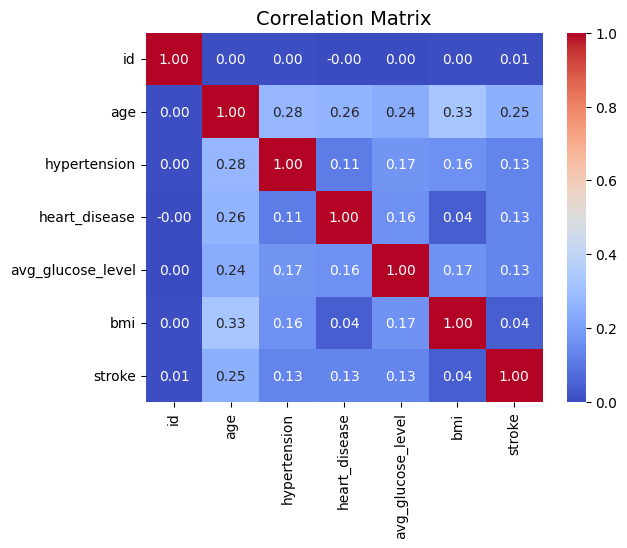

In [210]:
corr_matrix = df.corr()

sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, fmt='.2f', annot_kws={"size": 10})
plt.title("Correlation Matrix", fontsize=14)
plt.show()


#### Are there any patterns or trends in the data that suggest possible interventions or preventive measures for stroke?

Text(0.5, 1.0, 'Prevalence of Stroke by Residence Type')

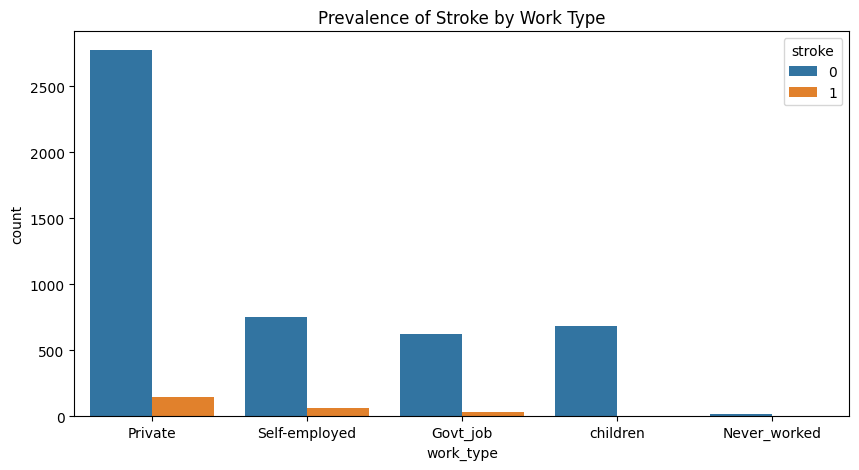

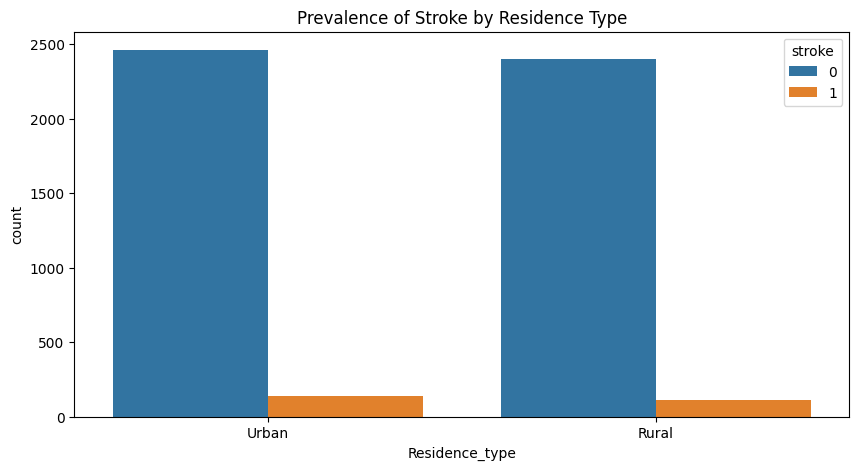

In [211]:
# Visualize the prevalence of stroke by work type and residence type
plt.figure(figsize=(10,5),dpi=100)
sns.countplot(data = df,x=df['work_type'],hue="stroke")
plt.title("Prevalence of Stroke by Work Type")

plt.figure(figsize=(10,5),dpi=100)
sns.countplot(data = df,x=df['Residence_type'],hue="stroke")
plt.title("Prevalence of Stroke by Residence Type")


<h3><b> Stroke Prediction Model

<h4> Featuer Selection

In [ ]:
X = df.drop(["stroke"], axis=1)
y = df["stroke"]

<h4> Featuer Encoding

In [ ]:
# Convert categorical variables into numerical using one-hot encoding
X_encoded = pd.get_dummies(X)


<h4> Building logistic regression model

1.   List item
2.   List item



In [216]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9403131115459883


<h3><b> Conclusion : </b>

The logistic regression model accurately predicts the occurrence of stroke with a 94% accuracy rate.